<a href="https://colab.research.google.com/github/sd3ntato/SPM_Project/blob/main/plots_and_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

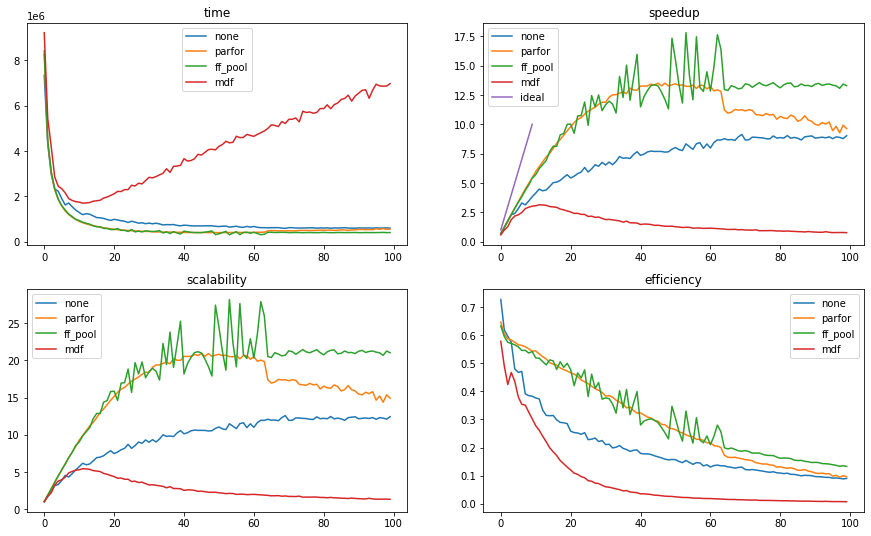

In [ ]:
methods = ['none', 'parfor', 'ff_pool', 'mdf']
t = {} # time
t0 = {} # seq time
sp = {} # speedup
sc = {} # scalab.
e = {} # effic.

# prepare plots
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# this serves to compute efficency
i = np.array(range( 100 )) + 1 

for m in methods:

  # read file relative to selected method
  with open(m +'_times') as f:
    lines = f.readlines()

  # extract seq time from the lines of the file
  t0[m] = float( lines[1][10:]) 

  # extract time for each par-degr. from the lines of the file
  t[m] = np.array(lines[3:], dtype = float)

  #compute metrics
  sp[m] = t0[m] / t[m]
  sc[m] = t[m][0] / t[m]
  e[m] = sp[m] / i

  # do de plots.
  axs[0, 0].plot(t[m], label = m)
  axs[0, 1].plot(sp[m], label = m)
  axs[1, 0].plot(sc[m], label = m)
  axs[1, 1].plot(e[m], label = m)

axs[0, 1].plot(i[:10], label = 'ideal')

# set titles and plot legends
axs[0, 0].set_title('time'); axs[0, 1].set_title('speedup') ; axs[1, 0].set_title('scalability') ; axs[1, 1].set_title('efficiency')
axs[0, 0].legend(); axs[0, 1].legend(); axs[1, 0].legend(); axs[1, 1].legend()

In [ ]:
# dove e quanto vanno meglio i piú veloci
print( np.argmax(sp['parfor']), np.argmax(sp['ff_pool']) )
print( max(sp['parfor']), max(sp['ff_pool'] ) )

45 53
13.505099479148177 17.80719792622561


In [ ]:
# media speedups vicino a dove vanno meglio
np.mean( sp['parfor'][45-5:45+5] ), np.mean( sp['ff_pool'][-20:] )

(13.345746905675776, 13.330905559790404)